# Scikit Learn categorization with bank transactions
### Goal
Being able to categorize each transactions by transaction name.
### Methods
Manual categorization to create dataset
Find dataset that has business name and categories for training
Tracker
- Goal1. Use manual categorized dataset and create classifier that would return results.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [50]:
#Importing csv
df_train_data = pd.read_csv('../datasets/2024-02-11_transaction_download.csv')
df_test_data = pd.read_csv('../datasets/transactions_test.csv')

In [53]:
df_train_data.head()

,Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit
0,2023-12-30,2023-12-30,7885,WORLDOFRACING,Entertainment,283.59,NaN
1,2023-12-28,2023-12-30,7885,TST* EM 7 GRAMS TUSTIN,Dining,57.53,NaN
2,2023-12-28,2023-12-29,7885,SQ *AIROMA CAFE,Dining,13.35,NaN
3,2023-12-23,2023-12-28,7885,Returned Mobile ACH Payme,Other,309.00,NaN
4,2023-12-28,2023-12-28,7885,LULULEMONCOM*,Merchandise,137.92,NaN


In [54]:
df_test_data.head()

,Transaction Date,Posted Date,Card No.,Description,Category,Debit,Credit
0,2024-02-10,2024-02-10,7885,INTEREST CHARGE:PURCHASES,Fee/Interest Charge,12.20,NaN
1,2024-02-09,2024-02-10,7885,BEST BUY 00001297,Merchandise,53.87,NaN
2,2024-02-08,2024-02-10,7885,FTB CAFETERIA,Dining,6.75,NaN
3,2024-02-08,2024-02-09,7885,UBER *JiMiJustMeat,Dining,12.39,NaN
4,2024-02-04,2024-02-06,7885,SAFEWAY #2620,Merchandise,43.97,NaN


In [55]:
#Simple cleaning...

#df[['Category']] = df[['Category']].apply(lambda x: x.str.lower())

#Drop values that are NaN/null
#df=df.dropna()
#df = df.drop(df[df['Category'] == 'zelle'].index)
#df = df.drop(df[df['Category'] == 'withdrawl'].index)
#Filter columns
df_train_data=df_train_data[['Description', 'Category']]

df_train_data.describe()

,Description,Category
count,546,546
unique,330,15
top,CAPITAL ONE MOBILE PYMT,Dining
freq,32,201


Text(0, 0.5, 'Occurence')

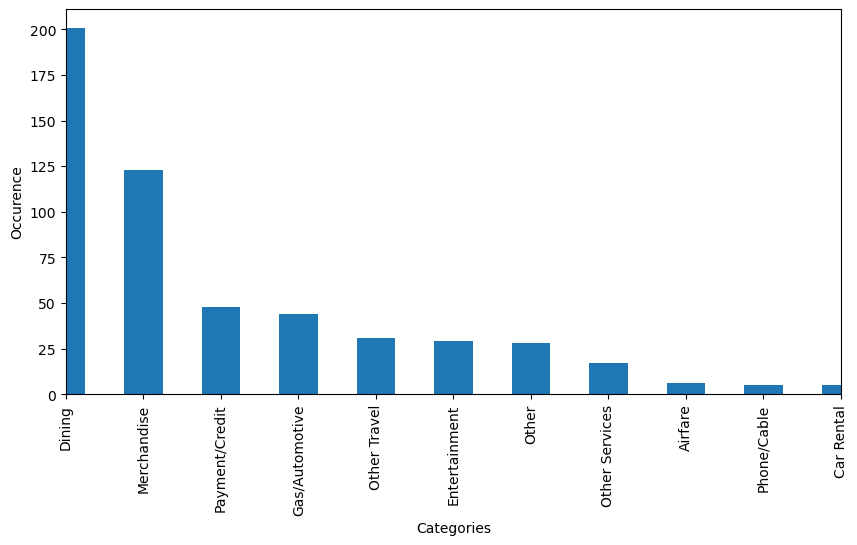

In [57]:
df_train_data['Category'].value_counts().plot(kind='bar', figsize=(10, 5)).set_xlim(0,10)
plt.xlabel('Categories')
plt.ylabel('Occurence')

In [58]:
data_np = df_train_data.to_numpy()
data_np[:10]

array([['WORLDOFRACING', 'Entertainment'],
       ['TST* EM 7 GRAMS TUSTIN', 'Dining'],
       ['SQ *AIROMA CAFE', 'Dining'],
       ['Returned Mobile ACH Payme', 'Other'],
       ['LULULEMONCOM*', 'Merchandise'],
       ['UBER   *NanShanTieB', 'Dining'],
       ['STARBUCKS 800-782-7282', 'Dining'],
       ['CAPITAL ONE MOBILE PYMT', 'Payment/Credit'],
       ['FTB CAFETERIA', 'Dining'],
       ['AMAZON.CO.JP', 'Merchandise']], dtype=object)

In [35]:
Xtrain, Xtest = train_test_split(data_np, random_state=42)
Xtrain[:10]

array([['TST* Grid Bar & Grill', 'dining'],
       ['KFC/AW #161', 'dining'],
       ['HAMMER/I-5 INVESTMENTS', 'gas/automotive'],
       ['TOP CHOICE RESTAURANT', 'dining'],
       ["TST* HARLOW'S", 'dining'],
       ['SQ *OLD COYOTE', 'dining'],
       ['HAMMER/I-5 INVESTMENTS', 'gas/automotive'],
       ['SQ *18 GRAMS COFFEE RO', 'dining'],
       ['UBER* TRIP', 'other travel'],
       ['CAPITAL ONE MOBILE PYMT', 'payment/credit']], dtype=object)

In [36]:
cv = CountVectorizer(token_pattern=r'[^\s,][^,]+')

In [38]:
X_train_counts = cv.fit_transform(Xtrain[:, 0])

In [40]:
X_train_counts.shape

(409, 257)

In [43]:
categories = Xtrain[:, 1]
target = pd.factorize(categories)

In [44]:
clf = MultinomialNB().fit(X_train_counts, target[0])

In [45]:
def predict(data):
    #docs_new has to be one dimentional list
    docs_new = data
    X_new_counts = cv.transform(docs_new)
    predicted = clf.predict(X_new_counts)
    result = []
    for i in predicted:
        result.append(target[1][i])
    return result

In [48]:
df = pd.DataFrame(zip(predict(Xtest[:, 0]), Xtest[:, 0]), columns=['predicted_category', 'given_data'])

In [60]:
df.head()

,predicted_category,given_data
0,dining,CHIPOTLE 2158
1,dining,Amazon Prime*0N3833CF3
2,merchandise,KP INTERNATIONAL MARKE
3,dining,FALLON HOUSE ICE CREAM
4,payment/credit,CAPITAL ONE MOBILE PYMT
